# Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Microlensing Injection

In [2]:
def flux_pspl(u0, t, t0, tE, F_S, F_B):
    """
    Magnification factor for flux of point source due to a point lens (PSPL model).
    The true flux from the point source is magnified by the point lens by the mean_function and
    as a result can be used to detect faint (or MACHO) objects in the universe

    Source: https://www.microlensing-source.org/concept/point-lenses/
            https://www.microlensing-source.org/glossary/

    Args:
        u0 (_type_): the impact parameter between the source and the lens 
        (i.e. minimum separation)
        t (_type_): time
        t0 (_type_): the time of closest approach between the source and lens
        (i.e. at t = t0, u = u0)
        tE (_type_): the Einstein crossing time = the time for the source to travel 1 Einstein radius
        F_S (_type_): Flux received from the source (as opposed to F_B)
        F_B (_type_): Flux from background sources blended with the source.
    # rename?
    Returns:
        _type_: Magnification factor of the brigtness from point source due to the point lens
    """
    tau = (t-t0)/tE # represents the fraction of event time that has already passed
    u = np.sqrt(np.square(u0) + (np.square(tau))) 
    return F_S * (np.square(u) + 2)/(u * np.sqrt(np.square(u) + 4)) + F_B

# Maybe change to interms of tau

In [3]:
t = np.linspace(-10, 10, 10000)
lc = np.ones_like(t)
F_S = np.median(lc)
F_B = 0
t0 = 0  # np.random.normal(loc=np.mean(lc), scale=100) # in days
tE = 1  # t_E = np.random.uniform(low = 0, high = 0)
u0 = np.random.uniform(low=0, high=2)

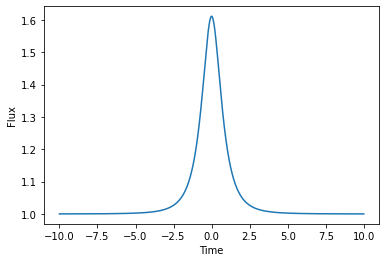

In [4]:
flux = flux_pspl(u0, t, t0, tE, F_S, F_B)
plt.plot(t, flux)
plt.xlabel("Time")
plt.ylabel("Flux")
plt.savefig("plots/simMicroLensEvent.jpg")

# Simulation assumptions

$F_S$ = median flux in the light curve

$F_B$ = 0 initially 

> `Nate's code: lines 320 - 323`

>  `Fbase = pm.Normal('Fbase',mu=F_base_mu,sd=F_base_sigma,testval=F_base_mu)`

>    `b_sff = pm.Uniform('b_sff',lower=0,upper=1+10/np.min(F),testval=0.5)`

>    `F_S = pm.Deterministic('F_S',Fbase*b_sff)`

>  `F_B = pm.Deterministic('F_B',Fbase-F_S)`

$t-t_0$ = uniformly distributed over 0-100 days OR

> `Nate's code - line 325:`

> `t0 = pm.Normal('t0',mu=OGLE_t0,sd=100.,testval=OGLE_t0)`

$t_E$ = Nate's priors 

*Alternative could also build $t_E$ into $t-t_0$ so we can uniformly distribute $\tau = \frac{t-t_0}{t_E}$ i.e. uniform distribution of 
    $\tau \in (-5, 0)$*

u0 = Uniform Prior
> `Nate's code line 327:` 

> `u0 = pm.Uniform('u0', lower=0,upper=2,testval=OGLE_u0+0.001)`


m2 - m1 = -2.5 log(f1/f2)

flux_injected / flux_observed = magnification

m_injected - m_observed = -2.5log(flux_injected/flux_observed)

A.  flux_injected = flux_observed * A

mag_injected = mag_observed + -2.5*np.log10(A)

flux_injected = flux_observed + (A-1)*np.median(flux_observed)  # little better; doesn't magnify the noise?

# Exercise:

### Lightcurve of a Point-Source, Point-Lens Event

Let's look again at our example microlensing event, where ML = 0.4M☉, DL=4kpc and DS=8kpc, and let's say that the relative angular motion between the two is 0.1 milli-arcsec / day. Using our usual lens-centered geometry, we take the lens to be stationary and the source to be moving along a trajectory behind it. Consider 4 trajectories, which pass the lens at progressively smaller closest-approach separations.

Over a 30d period, calculate the angular separations of lens-source for each day on each trajectory. Plot the lightcurve of the source for each trajectory in terms of the magnification.

In [5]:
# First we need to calculate u over the 30d
import astropy.constants as const
M_L = 0.4 * const.M_sun
D_L = 4 * const.kpc
D_S = 8 * const.kpc
alpha_dot = 0.1 * 1e-3 * 4.84814e-6 / 86400  # milli-arcsec/day to radians/sec
t = np.arange(-31, 31, 0.01, dtype=float) * 86400
alpha_0 = 0.1 * 4.84814e-9 * 6
alpha = np.hypot(alpha_0, alpha_dot * t)

D_LS = D_S - D_L
mu = 1 + (D_L/D_LS)
theta0 = np.sqrt((4 * const.G * M_L) / (mu * D_L * const.c**2) )
u = abs(alpha/theta0)


# once we have calculated u, we can calculate A
A = (np.square(u) + 2)/(u * np.sqrt(np.square(u) + 4))


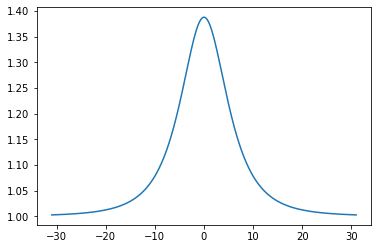

In [6]:
plt.plot(t/86400, A)